
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [150]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [151]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [152]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

### Filtrado de valores extremos y erroneos
Se consideran como extremos los valores de sueldos por encima del percentil 95 y por debajo del 5.

Luego se eliminan los resultados inválidos.

In [153]:
min_salary = df.salary_monthly_NETO.quantile(0.05)
max_salary = df.salary_monthly_NETO.quantile(0.95)

filter = df[(df['salary_monthly_NETO'] > min_salary) & (df['salary_monthly_NETO'] < max_salary)]

filter = filter[filter['tools_programming_languages'] != 'Ninguno']


### Gráfico para primera visualización de los datos

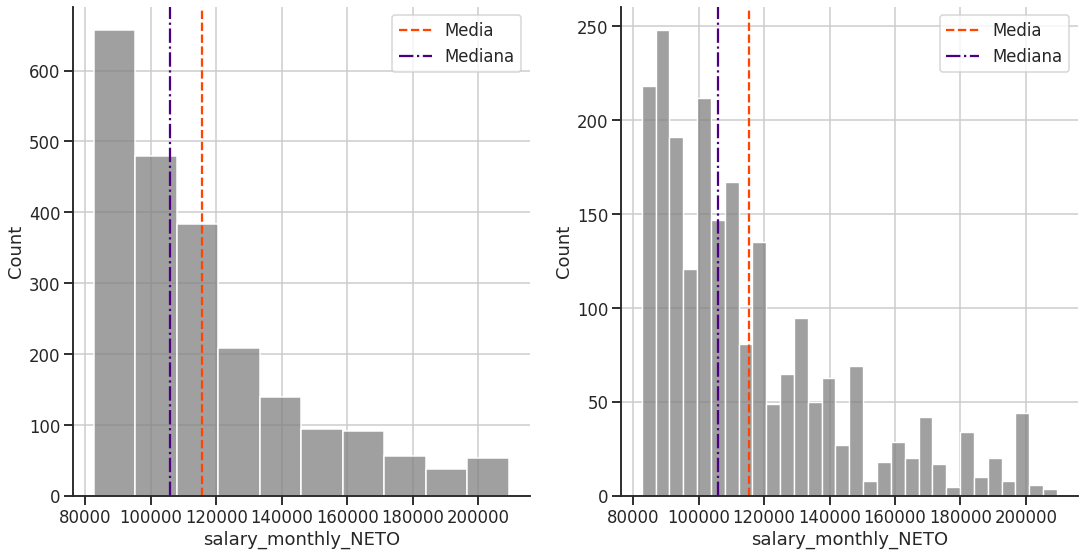

In [154]:
mean_smn = np.mean(filter.salary_monthly_NETO)
median_smn = np.median(filter.salary_monthly_NETO)

df_clean_rec_mean = filter[filter.salary_monthly_NETO > mean_smn]
df_clean_rec_median = filter[filter.salary_monthly_NETO > median_smn]


ncols = 2
figure1, axes = plt.subplots(1, ncols, figsize=(18, 9))
ax11, ax12 = axes.flatten()

sns.histplot(df_clean_rec_mean['salary_monthly_NETO'], bins=10, ax=ax11,
                stat='count', color='gray')  # histograma con 10 bins-.
ax11.axvline(df_clean_rec_mean['salary_monthly_NETO'].mean(),
                color='orangered', linestyle='--', label='Media')
ax11.axvline(df_clean_rec_mean['salary_monthly_NETO'].median(),
                color='indigo', linestyle='-.', label='Mediana')
sns.histplot(df_clean_rec_mean['salary_monthly_NETO'], bins=30, ax=ax12,
                stat='count', color='gray')  # histograma con 30 bins-.
ax12.axvline(df_clean_rec_mean['salary_monthly_NETO'].mean(),
                color='orangered', linestyle='--', label='Media')
ax12.axvline(df_clean_rec_mean['salary_monthly_NETO'].median(),
                color='indigo', linestyle='-.', label='Mediana')

ax11.legend()
ax12.legend()

ax11.grid()
ax12.grid()

sns.despine()

plt.show()

#### Conclusión
Aun habiendo eliminado los sueldos grandes (correspondientes solo al 5% de los datos), la media es mayor que la mediana, lo cual nos dice que la distribucion tiene una cola hacia valores grandes y no se corresponde a una distribucion normal.

### Se obtienen los lenguajes más populares

In [155]:
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Crear una columna nueva con la lista de lenguajes en lugar de un string
filter.loc[:, 'cured_programming_languages'] = filter.tools_programming_languages\
    .apply(split_languages)

# Se seleccionan los top 99 conjuntos de lenguajes más populares debido a que la grán mayoría de los casos son únicos tienen una sola ocurrencia.
language_count = filter.cured_programming_languages.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'cured_programming_languages': 'frequency'})

language_count = language_count[language_count['language'].astype(bool)]

language_count = language_count[language_count['frequency'] > language_count.frequency.quantile(0.99)]

freq_list = language_count['language'].to_list()

filter_top = filter[filter['cured_programming_languages'].isin(freq_list)].reset_index()

# Filtrado extra para eliminar algúnos valores con formato incorrecto
filter_top['tools_programming_languages'] = filter_top['tools_programming_languages'].replace('Python, Sql', 'Python, SQL').replace('SQL, Ninguno de los anteriores', 'SQL')


### Gráfica del top

[]

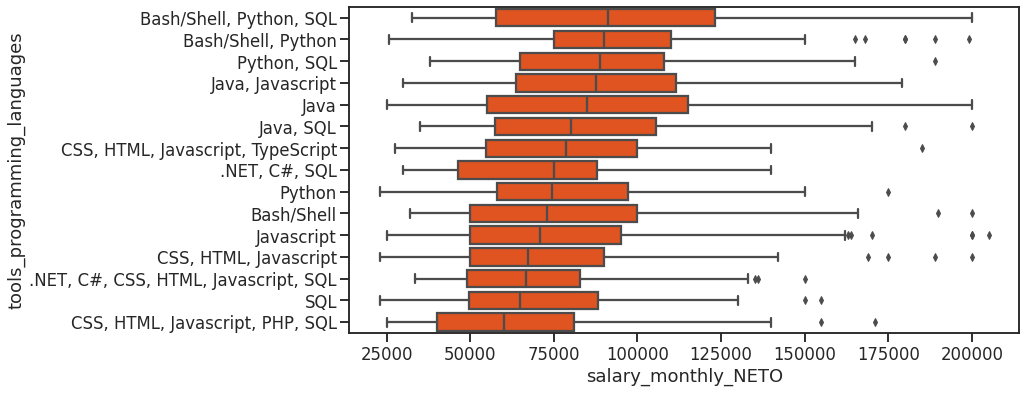

In [156]:
result = filter_top.groupby('tools_programming_languages')\
    ['salary_monthly_NETO'].\
    aggregate(np.median).\
    reset_index().sort_values('salary_monthly_NETO',
                              ascending=False)

plt.figure(figsize=(12, 6))
sns.boxplot(data=filter_top, x='salary_monthly_NETO', y='tools_programming_languages',
                color='orangered', order=result['tools_programming_languages'])
plt.ticklabel_format(style='plain', axis='x')
plt.plot()

### Medidas de la muestra

In [157]:
# Se obtienen medidas del data set

selected_columns_top = filter_top.filter(items=['salary_monthly_NETO', 'tools_programming_languages'])
tmp = selected_columns_top.groupby(['tools_programming_languages']).mean().round(2).rename(columns={'salary_monthly_NETO': "media"})
tmp.loc[:, 'mediana'] = selected_columns_top.groupby(['tools_programming_languages']).median().round(2).salary_monthly_NETO
tmp.loc[:, 'desviacion_std'] = selected_columns_top.groupby(['tools_programming_languages']).std().round(2).salary_monthly_NETO
tmp.loc[:, 'coef_var'] = ((tmp["desviacion_std"]/tmp["media"])*100).apply(lambda s: '{0:.2f}'.format(s))
tmp['coef_var'] = pd.to_numeric(tmp['coef_var'])
tmp = tmp.sort_values(by='media', ascending=False)
tmp = tmp.reset_index()
tmp

,tools_programming_languages,media,mediana,desviacion_std,coef_var
0,"Bash/Shell, Python, SQL",94895.21,91200.0,45119.09,47.55
1,"Bash/Shell, Python",94427.37,90000.0,32679.81,34.61
2,"Java, Javascript",90436.42,87500.0,36231.07,40.06
3,"Python, SQL",90147.38,88700.0,33682.20,37.36
4,Java,87705.75,84900.0,38956.73,44.42
5,"Java, SQL",84269.78,80000.0,35896.93,42.60
6,Python,79591.85,74500.0,28991.42,36.43
7,Javascript,78850.30,71000.0,38819.17,49.23
8,"CSS, HTML, Javascript, TypeScript",78661.17,78500.0,32225.82,40.97
9,Bash/Shell,78195.41,73000.0,35060.54,44.84


En esta tabla se pueden ver distintas medidas de los datos en el data frame.

Para casi todos los lenguajes se cumple que la media es mayor a la mediana. Esto nos indica que la curva que desriben estos datos tiene su pico por debajo de la media. Una gran dispersión por lo tanto, nos va a indicar que se trata de una curva más suave y por lo tanto con mayor posibilidad de obtener un salario elevado.


[Text(0, 0, 'Javascript'),
 Text(1, 0, 'CSS, HTML, Javascript, PHP, SQL'),
 Text(2, 0, 'Bash/Shell, Python, SQL'),
 Text(3, 0, 'CSS, HTML, Javascript'),
 Text(4, 0, 'Bash/Shell'),
 Text(5, 0, 'Java'),
 Text(6, 0, '.NET, C#, CSS, HTML, Javascript, SQL'),
 Text(7, 0, 'Java, SQL'),
 Text(8, 0, 'CSS, HTML, Javascript, TypeScript'),
 Text(9, 0, 'Java, Javascript'),
 Text(10, 0, 'SQL'),
 Text(11, 0, 'Python, SQL'),
 Text(12, 0, '.NET, C#, SQL'),
 Text(13, 0, 'Python'),
 Text(14, 0, 'Bash/Shell, Python')]

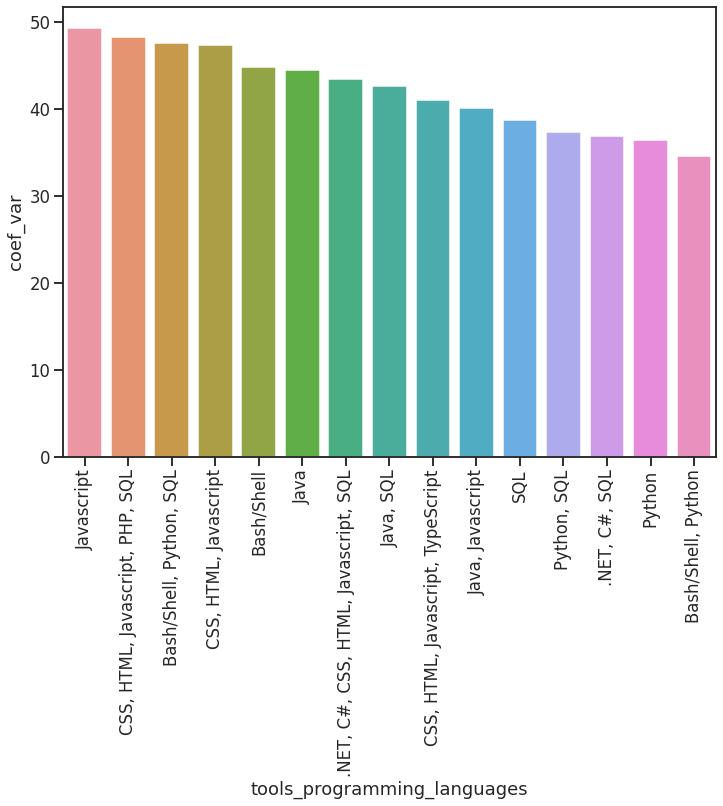

In [158]:
coef_var_order = tmp.sort_values(by='coef_var', ascending=False)

ax = sns.barplot(x="tools_programming_languages", y="coef_var", data=coef_var_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

### Distribuciones de salario por lenguaje

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='tools_programming_languages'>

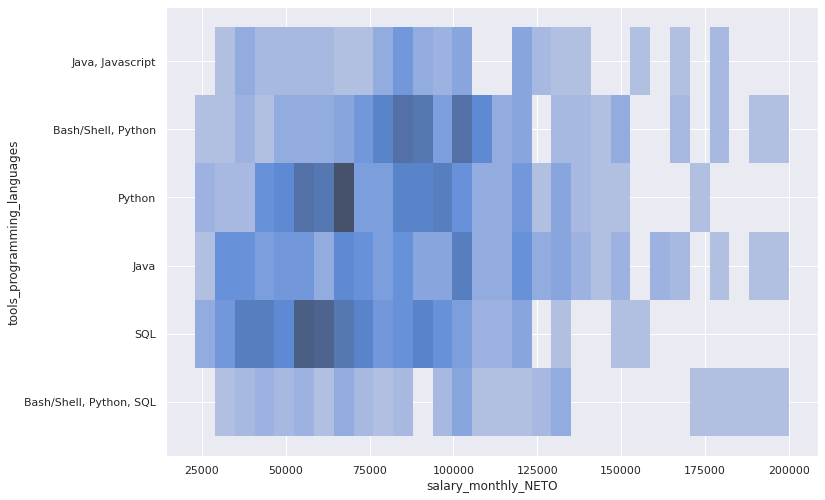

In [159]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Se seleccionaron algúnos lenguajes interesantes para graficar en base a las disperciones y valores mínimos o máximos de la media o mediana.
selected_lang = filter_top.loc[filter_top['tools_programming_languages'].isin(['SQL','Bash/Shell, Python, SQL','Python','Bash/Shell, Python','Java, Javascript','Java'])]
selected_lang
sns.histplot(selected_lang, x="salary_monthly_NETO", y="tools_programming_languages", element="poly", bins=30)

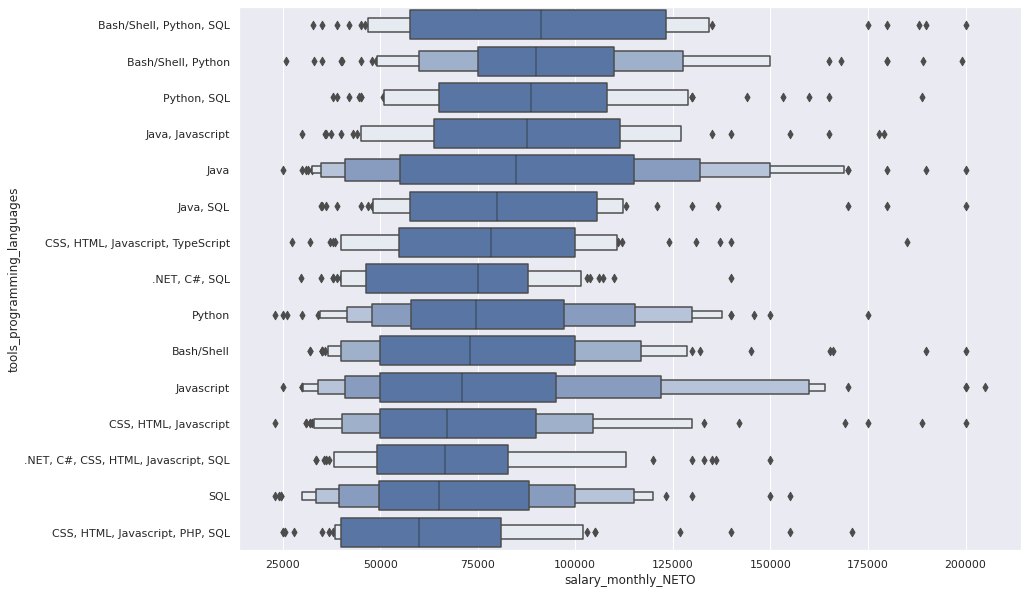

In [160]:
plt.figure(figsize = (14,10))
ax = sns.boxenplot(y="tools_programming_languages", x="salary_monthly_NETO",
              color="b", orient='h',
              scale="linear", data=filter_top,order=result['tools_programming_languages'])

Como se dijo anteriormente, utilizamos la mediana como estadistico de tendencia central ya que es mas robusto ante datos extremos, y como vemos para todos los lenguajes o grupos de lenguajes analizados hay muchos puntos aislados que se apartan de la tendencia por tener salarios muy por encima del promedio, por lo que consideramos que el promedio es un estadistico de tendencia central algo engañoso para discriminar salarios altos y bajos.

A la misma conclusión se puede llegar con el gráfico de barras de los distintos coeficientes de variación de cada grupo de lenguajes. Ya que cada uno muestra un coeficiente elevado (entre un 34.61% y 49.23%), indicando que la media de los salarios no puede ser una medida representativa por el alto grado de dispersión de los datos.

En general y para todos los lenguajes y/o grupos de lenguajes, el intervalo de sueldos entre el Q1 y el Q3 es aproximado; sin embargo, la cantidad de valores -extensión más allá de los límites Q1 y Q3 de las cajas- de sueldos mayores a Q3 es variable para los diferentes lenguajes de programación, inclusive, algunos presentan valores atípicos. Esto confirma también la tendencia general descrita al inicio del informe (análisis de la distribución de los salarios netos mensuales).

En el grafico de arriba podemos ver que la terna {Bash/Shell, Python, SQL} que es la que esta asociada a la ciencia de datos es la que tiene mediana mas alta, o sea la mejor paga de acuerdo a nuestros criterios, pero es importante notar que existen otros lenguajes, como Java, Javasript o la dupla {Bash/Shell, Python} que tienen mas población dentro de los cuantiles mas altos, lo que indica que hay una mayor probabilidad de cobrar un salario alto con resepecto al promedio si se manejan estos lenguajes.

Concluimos entonces que los grupos de lenguajes asociados a salarios mas altos son:
 - Bash/Shell,Python,SQL
 - Bash/Shell,Python
 - Python,SQL
 - Java,Javascript
 - Java

Notando tambien, al menos graficamente con el boxenplot, que los lenguajes Java y Javascript poseen mayor población en los cuantiles mas altos, lo que indica preliminarmente que aquellos que dominan estos lenguajes tienen mayor probabilidad de cobrar salarios muy altos.


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




### Solución

Se realizaron varios análisis utilizando distintos conjuntos de variables categóricas y numéricas.

Un primer análisis consistió en la validación de la hipotesis sencilla de que a medida que la edad aumenta, los salarios lo hacen de la misma forma y si en todas las provincias se cumple lo mismo.

#### Filtrado de los datos
Se eliminan posibles errores en los datos de edades y salarios fuera de escala o extremos.

In [161]:
selected_df = df.filter(items=["work_province", "profile_age", "salary_monthly_BRUTO"])
selected_df = selected_df[selected_df['profile_age'] < 100]
selected_df = selected_df[selected_df['profile_age'] > 10]
selected_df = selected_df[selected_df['salary_monthly_BRUTO'] < df.salary_monthly_BRUTO.quantile(0.98)]
selected_df = selected_df[selected_df['salary_monthly_BRUTO'] > df.salary_monthly_BRUTO.quantile(0.02)]

Se obtiene una primera visualización en forma de tabla para entender la realidad por provincia

In [162]:
description = selected_df.groupby(by=['work_province']).mean().round(2).rename(columns={'profile_age': "age_mean",'salary_monthly_BRUTO': "salary_mean"})
description = description.sort_values(by='age_mean')
description.loc[:,'n_samples'] = selected_df.groupby(by=['work_province']).profile_age.count().to_frame('tmp').tmp
description = description.reset_index()
description

,work_province,age_mean,salary_mean,n_samples
0,San Juan,29.14,56942.86,7
1,La Rioja,29.57,60538.74,14
2,La Pampa,30.88,84736.38,8
3,Formosa,31.00,68924.50,4
4,Chaco,31.08,67933.58,24
5,Córdoba,32.12,113136.53,431
6,Santa Cruz,32.17,40102.50,6
7,Entre Ríos,32.27,86552.31,59
8,Misiones,32.28,62114.68,25
9,Ciudad Autónoma de Buenos Aires,32.37,120526.83,3637


Se seleccionan las provincias con más samples para graficar y comprobar la hipotesis

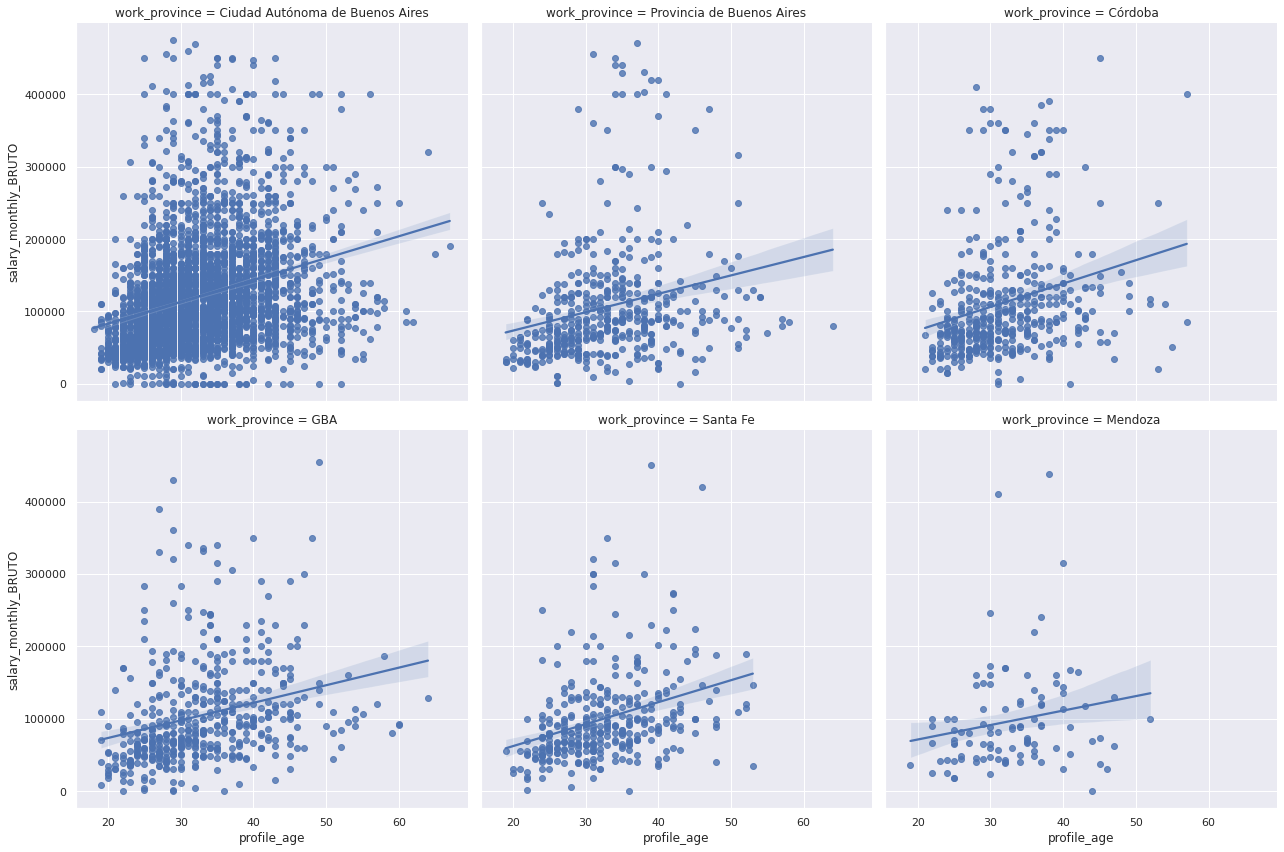

In [163]:
most_populated_provinces = description[description.n_samples > description.n_samples.quantile(0.75)].work_province.tolist()

selected_provinces_df = selected_df[selected_df['work_province'].isin(most_populated_provinces)]

g = sns.lmplot(x="profile_age", y="salary_monthly_BRUTO", col="work_province", data=selected_provinces_df, col_wrap=3, height=6)

Se puede ver que se cumple la hipotesis, ya que los salarios tienen a ser superiores a medida que el sujeto tiene mayor edad en todas las provincias con muestras suficientes para hacer el análsis.

#### Otro caso

Se propone analizar si los años de experiencia tienen algúna relacion con el rol que se cumple. Se espera que ciertos roles de gestión y expertice técnica, requieran más años de experiencia.

In [164]:
selected_df = df.filter(items=["work_role", "profile_years_experience"])
selected_df = selected_df[selected_df['profile_years_experience'] > 0]
selected_df = selected_df[selected_df['profile_years_experience'] < 50]
selected_df.groupby(by=['work_role']).mean().round(2)

work_role_count = selected_df.work_role.value_counts()\
    .reset_index()

work_role_count = work_role_count[work_role_count['index'].astype(bool)]

work_role_count = work_role_count[work_role_count['work_role'] > work_role_count.work_role.quantile(0.98)]

freq_list = work_role_count['index'].to_list()

filter_top = selected_df[selected_df['work_role'].isin(freq_list)].reset_index()

filter_top

,index,work_role,profile_years_experience
0,1,Developer,5.0
1,3,SysAdmin / DevOps / SRE,15.0
2,4,Developer,9.0
3,5,Developer,1.0
4,6,Developer,1.0
...,...,...,...
4111,6090,Developer,13.0
4112,6091,SysAdmin / DevOps / SRE,12.0
4113,6092,QA / Tester,2.0
4114,6093,SysAdmin / DevOps / SRE,5.0


Se grafica para visualizar la correlación

In [165]:
freq_list

['Developer',
 'SysAdmin / DevOps / SRE',
 'Technical Leader',
 'QA / Tester',
 'Manager / Director',
 'Project Manager',
 'HelpDesk']

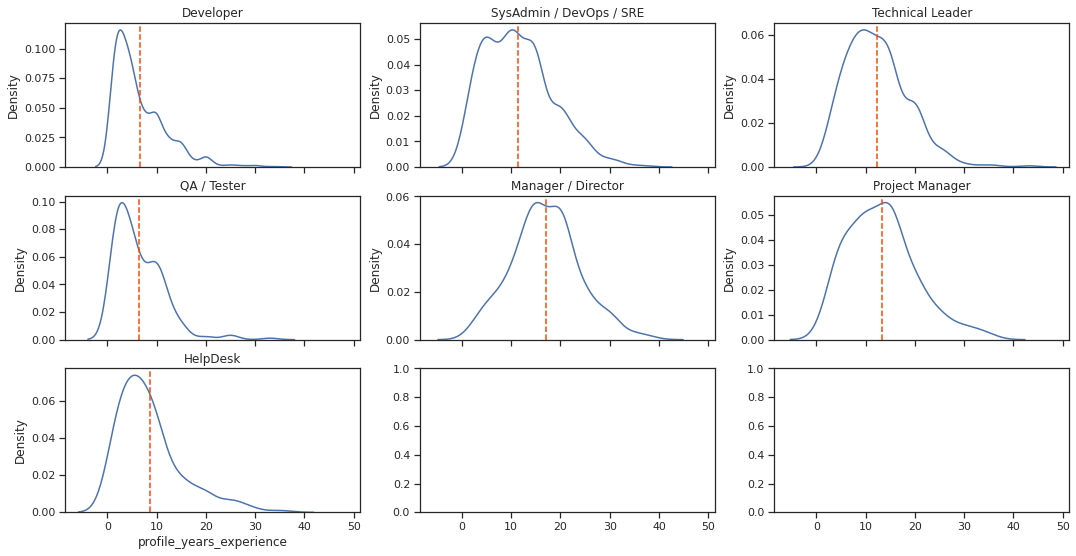

In [166]:
sns.set_style("ticks")

nrows = 3
ncols = 3
figure1, axes = plt.subplots(nrows, ncols, figsize=(18, 9),sharex=True)
ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33 = axes.flatten()

ax = [ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33]

for x in range(len(freq_list)):
    sns.kdeplot(x="profile_years_experience", data=filter_top[filter_top['work_role'] == freq_list[x]], ax=ax[x])
    ax[x].axvline(filter_top[filter_top['work_role'] == freq_list[x]].profile_years_experience.mean(),
                color='orangered', linestyle='--', label='Media')
    ax[x].title.set_text(freq_list[x])



Se puede ver que las graficas se corresponden con la hipotesis, ya que los valores medios de los años de experiencia aumentan para los roles de Project Manager, Director o Technical Leader. Mientras que los roles de QA, Helpdesk y Developer son en su mayoría tomados por individuos con poca experiencia.

El caso de SysAdmin o DevOps es interesante, por que se ve que la gráfica se extiende forma mucho más dispersa a lo largo del rango de años, lo cual no podría indicar que es un rol en el que se puede permanecer durante muchos años.

#### Otro análsis extra

En el siguiente análsis se calcula el ratio entre el salario y los años de experiencia. El cual nos permite saber "cuanto vale" el sueldo de cada rol en relación con el tiempo invertido para alcanzarlo.

Lo interesante, es que se puede ver que el rol de developer es el que tiene mejor ratio, ya que tiene un sueldo muy elevado para la cantidad de años de experiencia requeridos. Pero este ratio baja a medida que se asceinde a roles que requieren más años de experiencia. Por lo tanto se podría decir que los salarios aumentan en relación a los años de experiencia de manera desacelerada.

In [167]:
selected_df = df.filter(items=["work_role", "profile_years_experience", "profile_age", "salary_monthly_NETO"])
selected_df = selected_df[selected_df['profile_years_experience'] > 0]
selected_df = selected_df[selected_df['profile_years_experience'] < 40]
selected_df = selected_df[selected_df['profile_age'] < 100]
selected_df = selected_df[selected_df['profile_age'] > 10]
selected_df = selected_df[selected_df['salary_monthly_NETO'] < df.salary_monthly_BRUTO.quantile(0.98)]
selected_df = selected_df[selected_df['salary_monthly_NETO'] > df.salary_monthly_BRUTO.quantile(0.02)]
selected_df.groupby(by=['work_role']).mean().round(2)

work_role_count = selected_df.work_role.value_counts()\
    .reset_index()

work_role_count = work_role_count[work_role_count['index'].astype(bool)]

work_role_count = work_role_count[work_role_count['work_role'] > work_role_count.work_role.quantile(0.98)]

freq_list = work_role_count['index'].to_list()

filter_top = selected_df[selected_df['work_role'].isin(freq_list)].reset_index()

filter_top

description = filter_top.groupby(by=['work_role']).mean().round(2).rename(columns={'profile_age': "age_mean",'profile_years_experience': "experience_mean",'salary_monthly_NETO': "salary_mean"})
description = description.sort_values(by='age_mean')
description.loc[:, 'ratio_salary_exp'] = description.salary_mean / description.experience_mean
description

,index,experience_mean,age_mean,salary_mean,ratio_salary_exp
work_role,,,,,
Developer,2947.95,6.42,30.28,88842.49,13838.39
QA / Tester,2809.37,6.51,31.17,80624.61,12384.73
SysAdmin / DevOps / SRE,2955.59,11.29,34.33,86385.83,7651.53
Technical Leader,3071.25,12.09,34.96,125278.95,10362.20
Project Manager,3176.06,13.28,37.27,100202.48,7545.37
Manager / Director,3154.50,17.33,39.83,150994.03,8712.87


## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



### Solución

Si, existe una correlación lineal entre las columnas Salario Bruto y Neto. Se propone eliminar de la encuesta la columna de Salario Bruto para que la encuesta sea mas simple.

Se utiliza el **coeficiente de Pearson** para determinar la correlación. Esté tiene un valor de **0,83** lo que indica una alta correlación positiva entre las columnas.


In [168]:
#  Crear subconjunto de df.
df_s = df[["salary_monthly_BRUTO","salary_monthly_NETO"]]
df_s.head()

# Eliminar Nan
df_s = df_s.dropna(how='all')

# Coeficiente de Pearson
coef = df_s["salary_monthly_BRUTO"].corr(df_s["salary_monthly_NETO"])
coef

0.8333351176300585

Esta correlación positiva entre las dos variables se puede apreciar también por medio del siguiente grafico:

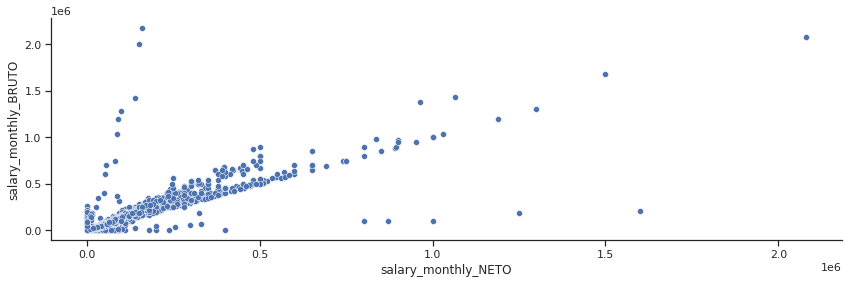

In [169]:
max_age = 99
sns.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=3, height=4, dropna= True)

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






### Solución


Se procede a seleccionar las columnas y filas relevantes para analizar. En este punto, las columnas a analizar serán profile_studies_level y salary_monthly_NETO.

En primer lugar se procede a verificar que no existan valores nulos en la columna "profile_studies_level"

In [170]:
df_psl_null_nan = df[(df['profile_studies_level'].isnull()) &
                     (df.profile_studies_level.isna())]

Luego se procede a filtrar los valores extremos de la columna "salary_monthly_NETO".

Tal como en el punto 1, se consideran como extremos los valores de sueldos por encima del percentil 95 y por debajo del 5.

Una vez identificado los extremos, se eliminan los resultados inválidos.

In [171]:
min_salary = df.salary_monthly_NETO.quantile(0.05)
max_salary = df.salary_monthly_NETO.quantile(0.95)

filter = df[(df['salary_monthly_NETO'] > min_salary) & (df['salary_monthly_NETO'] < max_salary)]

Posteriormente procedemos a identificar las subpoblaciones más numerosas, según nivel de fomración o estudio.

Para facilitar su identificación se crean grupos según el nivel de estudio y se los ordena en forma descendente según la cantidad de 
registros que integren cada subgrupo.

In [172]:
filter[['profile_studies_level']].groupby(['profile_studies_level'])['profile_studies_level'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

,profile_studies_level,count
6,Universitario,3569
5,Terciario,1020
4,Secundario,388
2,Posgrado,279
0,Doctorado,21
1,Posdoctorado,2
3,Primario,2


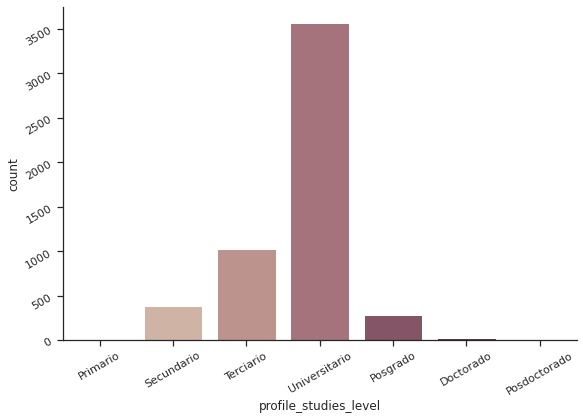

In [173]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado'] #lista de los nombres de categorías ordenadas

g =sns.catplot(x="profile_studies_level", kind="count", palette="ch:.25", data=filter,order=sorted_studies_levels,
               height = 5.5, aspect = 1.5)
plt.tick_params(labelrotation=30)

Como se puede apreciar, tanto en la tabla como en el gráfico de barras, se observa que los subgrupos más numerosos son 
el del Nivel Universitario (3569 registros) y el del Nivel Terciario (1020 registros).

En base a esto, se crean dos subdatasets (uno para cada grupo) y se grafican de forma comparativa en un histograma
que permita visualizar el salario de cada subgrupo y su distribución.

En el histograma se observa que para ambos grupos, los valores salariales se conentran en los montos
inferiors al millón. Y entre ambos grupos, los programadores con formación universitaria predominan. Es decir,
hay mayor cantidad de universitarios que cobran rangos de sueldos similares a los de aquellos con formación terciaria.
Una posible conclusión de esta visualización, es que el nivel de formación no es una variable que por sí sola determine
un mayor ingreso salarial.

Aunque por otro lado, entre los valores salariales más altos, predominan aquellos programadores que tienen una formación universitaria
Quizás este último escenario pueda explicarse por alguna variable extra como mayor cantidad de años de experiencia.

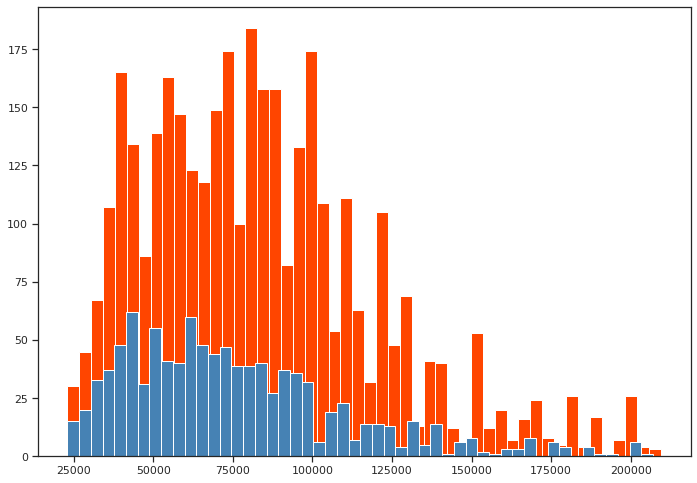

In [174]:
df_universitario= filter[ filter['profile_studies_level']=='Universitario']
df_terciario=filter[ filter['profile_studies_level']=='Terciario']

plt.hist(df_universitario['salary_monthly_NETO'], color='orangered', bins=50)
plt.hist(df_terciario['salary_monthly_NETO'], color='steelblue', bins=50) #aca importa el orden, cuidado con la superposición
plt.show()

#### ¿Considera que ambas variables son independientes? ¿Qué analizaría al respecto?

Al analizar la dependencia o independencia de las variables estudiadas (salario neto y nivel de formación),
una regla que podemos verificar si se cumple o no es aquella que plantea P(X=x, Y=y)=P(X=x). P(Y=y). En otras palabras,
determinar si la probabilidad conjunta entre X e Y, es igual al producto de las probabilidades marginales de X y de Y.

Para esto planteamos las siguientes probabilidades para verificar la igualdad indicada por la regla mencionada. Se quiere 
verificar si la probablidad conjunta entre tener un salario mayor al salario promedio y ser universitario, es igual al producto
entre las probabilidades marginales de ganar un salario mayor al salario promedio y la de ser universitario.
​
Caluclamos el salario primedio

In [175]:
avg_salary = filter['salary_monthly_NETO'].mean()
avg_salary

is_above_avg = filter[filter['salary_monthly_NETO'] > avg_salary]
universitario = filter[ filter['profile_studies_level']=='Universitario']

#Calculamos la probabilidad marginal de ser universitario
prob_marginal_universitario = len(universitario)/len(filter)
prob_marginal_universitario

#Calculamos la probabilidad de ganar un salario mayor al salario promedio
prob_marginal_above_avg = len(is_above_avg) / len(filter)
prob_marginal_above_avg

#Calculamos el producto entre las probabilidades marginales
prod_probs_marginales = prob_marginal_universitario * prob_marginal_above_avg
prod_probs_marginales

#Obtenemos la intersección entre las variables
intersection_count = len(filter.query('profile_studies_level.str.contains("Universitario") and salary_monthly_NETO > salary_monthly_NETO.mean()' , engine='python'))

#Calculamos la probabilidad conjunta
prob_conjunta = intersection_count / len(filter)
prob_conjunta

#Aquí se puede observar que la probabilidad conjunta es diferente al producto de las probabilidades marginales.
#En consecuencia, se demuestra que ambas variables no son independientes.

print(f"Probabilidad conjunta: {prob_conjunta}")
print(f"Producto de las probabilidades marginales:{prob_marginal_above_avg}")

Probabilidad conjunta: 0.3105472448399924
Producto de las probabilidades marginales:0.4400681689074039


La conclusión del punto anterior se puede rectficar con el siguiente ejercicio.

Se quiere validar si se cumple o no la regla que plantea P(X=x|Y=y)=P(X=x). Es decir, si la probablidad condicional de X dado Y, es igual a la probabilidad marginal de X. En el caso analizado, consistiría en determinar si la probabilidad condiconal de ganar por encima del salario que representa la mediana dado que se tiene una formación terciaria es igual a la probabilidad marginal de ganar por encima de la mediana.

In [176]:
#Se calcula la mediana
median_salary = filter['salary_monthly_NETO'].median()
median_salary

is_above_median = filter[filter['salary_monthly_NETO'] > median_salary]
terciario = filter[ filter['profile_studies_level']=='Terciario']

#Se calcula la probabilidad marginal de ganar por encima de la mediana
p_above_median = len(is_above_median) /len(filter)

intersection_count = len(filter.query('profile_studies_level.str.contains("Terciario") and salary_monthly_NETO > salary_monthly_NETO.median()' , engine='python'))

#Se calcula la probabilidad condicional de ganar por encima de la mediana dado que se tiene formación terciaria
p_condic_above_median = intersection_count/len(terciario)

#Aquí se puede observar que la probabilidad condicional es diferente de la probabilidad marginal
#En conclusión, las variables analizadas no son independientes, y se pudo demostrar mediante las diferencias obtenidas 
#dado que "P(X=x, Y=y) <> P(X=x).P(Y=y)", y "P(X=x|Y=y) <> P(X=x)".
#NOTA: el simbolo "<>" representa diferente.

print(f"Probabilidad condicional: {p_condic_above_median}")
print(f"Probabilidad marginal: {p_above_median}")

Probabilidad condicional: 0.3980392156862745
Probabilidad marginal: 0.499905320961939


#### Calcule medidas de centralización y dispersión para cada subpoblación

In [177]:
#A continuación se calculan algunas medidas de centralización y disperción para cada subpoblación.

#Subgrupo "Universitario"
#Medidas de Centralización

print(f"Media: {df_universitario['salary_monthly_NETO'].mean()}")
print(f"Mediana: {df_universitario['salary_monthly_NETO'].median()}")
print(f"Moda: {df_universitario['salary_monthly_NETO'].mode()}")

#Medidas de Dispersión

print(f"Varianza: {df_universitario['salary_monthly_NETO'].var()}")
print(f"Desviación Estandar: {df_universitario['salary_monthly_NETO'].std()}")
print(f"Coeficiente de variación: {df_universitario['salary_monthly_NETO'].std()/df_universitario['salary_monthly_NETO'].mean()}")

Media: 83629.46947043989
Mediana: 80000.0
Moda: 0    80000.0
Name: salary_monthly_NETO, dtype: float64
Varianza: 1329151551.7600634
Desviación Estandar: 36457.530796257495
Coeficiente de variación: 0.4359411942598054


In [178]:

#Subgrupo "Terciario"
#Medidas de Centralización

print(f"Media: {df_terciario['salary_monthly_NETO'].mean()}")
print(f"Mediana:{df_terciario['salary_monthly_NETO'].median()}")
print(f"Moda: {df_terciario['salary_monthly_NETO'].mode()}")

#Medidas de Dispersión

print(f"Varianza: {df_terciario['salary_monthly_NETO'].var()}")
print(f"Desviación Estandar: {df_terciario['salary_monthly_NETO'].std()}")
print(f"Coeficiente de varianción: {df_terciario['salary_monthly_NETO'].std()/df_terciario['salary_monthly_NETO'].mean()}")

Media: 75478.52470588234
Mediana:69545.5
Moda: 0    80000.0
Name: salary_monthly_NETO, dtype: float64
Varianza: 1233440454.9156706
Desviación Estandar: 35120.37093932339
Coeficiente de varianción: 0.46530282721048355


A modo de conclusión, si se comparan ambos subgrupos, en base al coeficiente de variación se puede ver que en ambos casos la
dispersión de los datos con respecto a la media es alta. Pero en el caso del grupo "Terciario" es mayor, dado que tiene un mayor valor

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


### Solución

Para este punto elegi como variables numericas al salario neto y a los años de antiguedad, y como variable categórica al género. 

El objetivo es ver como se relacionan los años de antiguedad con el salario y ver si, como se espera, los varones ganan mas que las mujeres para la misma antiguedad, ya que al hablar de comparar salarios, la antiguedad es un factor importante. Grafique ademas en el scatterplot el salario promedio para cada valor de antiguedad de forma de tener un buen criterio para distinguir salarios altos de bajos con solo mirar el gráfico.


In [179]:
# Le pido a pandas que me de todo con dos decimales de precision
pd.set_option("display.precision", 2)

# Filtro los salarios menores al salario minimo de 2020
dff = df[df['salary_monthly_NETO']>20000]

# Le pido que me ordene los valores de la columna de antiguedad en orden ascendente
data=dff.sort_values(by='work_years_in_company', ascending=True)
data.tail()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
4598,Hombre,49,Argentina,Ciudad Autónoma de Buenos Aires,29.0,29.0,2.0,25,Universitario,Completado,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Servicios / Consultoría de Software / Digital,7,8,"Abono de celular, Capacitaciones y/o cursos, H...",GOOGLE
2773,Hombre,54,Argentina,GBA,30.0,30.0,25.0,25,Universitario,Completado,...,Jamás,Heterosexual,n0,No,1001-2000,Otras industrias,8,9,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
5878,Hombre,54,Argentina,Ciudad Autónoma de Buenos Aires,36.0,34.0,8.0,2500,Posgrado,Completado,...,Jamás,Heterosexual,NaN,NaN,10001+,Otras industrias,7,5,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4028,Hombre,59,Argentina,Entre Ríos,30.0,40.0,30.0,9,Terciario,Completado,...,Jamás,Heterosexual,NaN,NaN,101-200,Otras industrias,8,9,"Abono de celular, Capacitaciones y/o cursos, H...",NaN
4733,Mujer,41,Argentina,Ciudad Autónoma de Buenos Aires,15.0,43.0,3.0,0,Posgrado,En curso,...,En un trabajo anterior,Heterosexual,NaN,No,5001-10000,Otras industrias,10,9,"Capacitaciones y/o cursos, Comidas pagas / sub...","JP Morgan,"


Agrupo los datos de acuerdo a la antiguedad y le pido que me haga estadistica en la columnda del salario neto, para saber mas o menos que 
valores manejamos

In [180]:
data.groupby(['work_years_in_company'])['salary_monthly_NETO'].describe()

,count,mean,std,min,25%,50%,75%,max
work_years_in_company,,,,,,,,
0.0,1388.0,99762.36,86738.39,20534.0,51696.50,80000.0,110000.00,1.00e+06
0.5,6.0,307386.67,359539.62,75000.0,76250.00,120000.0,407500.00,9.64e+05
1.0,1095.0,96441.34,98618.11,21600.0,51334.50,75000.0,106000.00,1.60e+06
1.3,1.0,60000.00,NaN,60000.0,60000.00,60000.0,60000.00,6.00e+04
1.4,5.0,69541.00,24835.72,26000.0,73505.00,78000.0,85100.00,8.51e+04
1.5,46.0,91329.52,86893.07,34000.0,49911.63,76500.0,98750.00,4.90e+05
1.6,2.0,63750.00,31466.25,41500.0,52625.00,63750.0,74875.00,8.60e+04
1.7,3.0,54649.00,7560.26,46000.0,51973.50,57947.0,58973.50,6.00e+04
1.8,2.0,60843.00,4464.67,57686.0,59264.50,60843.0,62421.50,6.40e+04


Aca me defino una lista en la que cada entrada es el promedio del salario neto para cada año de antiguedad en orden ascendente

In [181]:
mean = data.groupby(['work_years_in_company'])['salary_monthly_NETO'].mean()
print(mean)

work_years_in_company
0.0      99762.36
0.5     307386.67
1.0      96441.34
1.3      60000.00
1.4      69541.00
1.5      91329.52
1.6      63750.00
1.7      54649.00
1.8      60843.00
2.0     102623.82
2.5      72803.17
2.6      47000.00
2.7      77197.00
2.8     100000.00
3.0      94008.55
3.5      98792.86
4.0     102605.93
5.0      95981.44
6.0     104384.86
7.0      90443.72
8.0      99972.43
9.0      89520.82
10.0    111017.33
11.0    104137.60
12.0     88372.09
13.0     99340.47
14.0     97827.39
15.0    117114.71
16.0     97948.59
17.0    207048.21
18.0    120500.00
19.0    101750.00
20.0     87642.86
21.0     89003.22
22.0    108596.20
23.0     95590.25
24.0     90750.00
25.0     88222.22
27.0     84400.00
28.0     63666.67
29.0     74500.00
30.0     74000.00
34.0    480000.00
40.0    120000.00
43.0    105000.00
Name: salary_monthly_NETO, dtype: float64


Ahora me quiero hacer una lista de los valores que se obtuvieron en la encuesta para años de antiguedad en orden ascendente. Paso los valores
de la columna a una lista.

Elimino los repetidos usando el casteo a un conjunto y los ordeno

In [182]:
years = data['work_years_in_company']
years = sorted(set(years))

print(years)

[0.0, 0.5, 1.0, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 2.0, 2.5, 2.6, 2.7, 2.8, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 27.0, 28.0, 29.0, 30.0, 34.0, 40.0, 43.0]


Aca grafico todo. Uso hue en seaborn.scatterplot para que me grafique los años de antiguedad en funcion del salario neto discriminando por genero
Ademas uso las listas que me fabrique antes del dataframe para que me grafique los salarios promedio para cada valor distinto de antiguedad, de forma
de ver mejor a partir de que punto podemos decir que un salario es alto o bajo

<AxesSubplot:xlabel='Salario neto', ylabel='Años de antigüedad'>

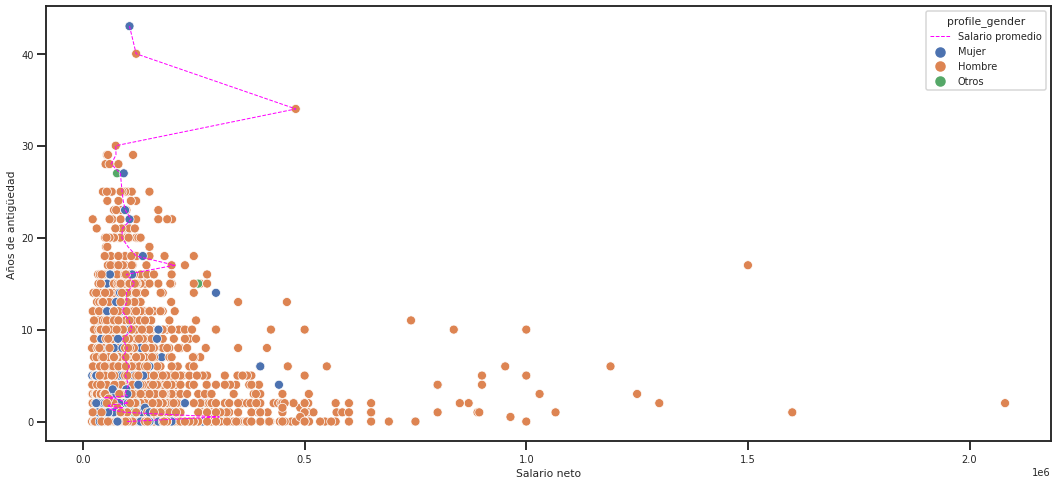

In [183]:
sns.set_context('talk',font_scale=0.6,rc={'figure.figsize':(10.0,15.0)})
plt.figure(figsize=(18,8))
plt.xlabel('Salario neto')
plt.ylabel('Años de antigüedad')
plt.plot(mean,years,linewidth=1.,linestyle='--',label='Salario promedio',color='magenta')
sns.scatterplot(data=dff,x='salary_monthly_NETO',y='work_years_in_company',hue='profile_gender')


En esta parte restrinjo los datos a los salarios menores al percentil 99, porque en el grafico anterior se ve que la densidad es muchisimo mayor 
en esos valores de salario que para salarios mas altos. Lo hago para distinguir mejor la dispersion de datos en esa zona

<AxesSubplot:xlabel='Salario neto', ylabel='Años de antigüedad'>

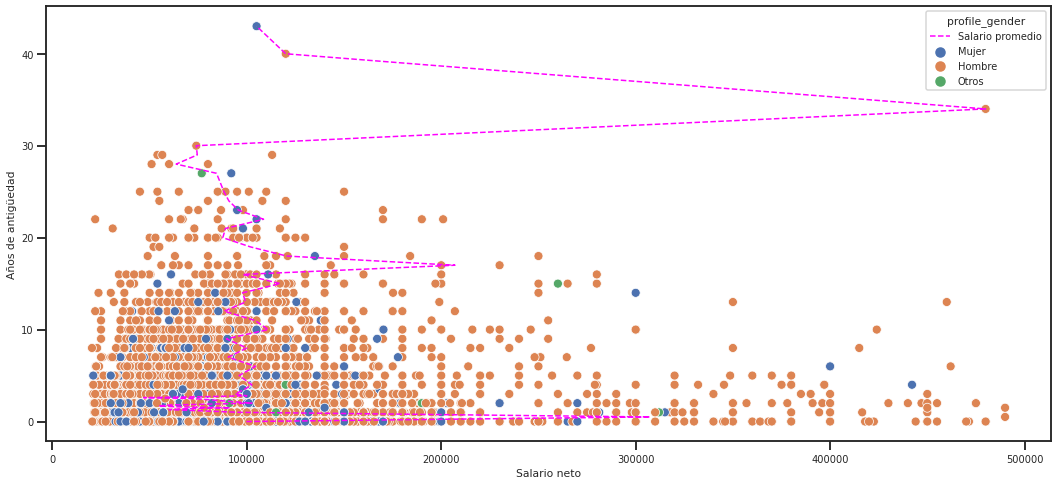

In [184]:
dfr = dff[dff['salary_monthly_NETO'] < dff.salary_monthly_NETO.quantile(0.99)]
sns.set_context('talk',font_scale=0.6,rc={'figure.figsize':(10.0,15.0)})
plt.figure(figsize=(18,8))
plt.xlabel('Salario neto')
plt.ylabel('Años de antigüedad')
plt.plot(mean,years,linewidth=1.5,linestyle='--',label='Salario promedio',color='magenta')
sns.scatterplot(data=dfr,x='salary_monthly_NETO',y='work_years_in_company',hue='profile_gender')

Ahora voy a graficar los salarios promedio por año de antiguedad distinguiendo por generos: mujer, hombre y no binarie. Uso el mismo procedimiento de antes


In [185]:
#Me creo nuevos dataframes que tengan solo los datos de cada género
data_w = data[data['profile_gender']=='Mujer']

data_m = data[data['profile_gender']=='Hombre']

data_q = data[data['profile_gender']=='Otros']

#Mujeres
mean_w = data_w.groupby(['work_years_in_company'])['salary_monthly_NETO'].mean()
years_w = data_w['work_years_in_company']
years_w = sorted(set(years_w))

#Varones
mean_m = data_m.groupby(['work_years_in_company'])['salary_monthly_NETO'].mean()
years_m = data_m['work_years_in_company']
years_m = sorted(set(years_m))

#No binaries
mean_q = data_q.groupby(['work_years_in_company'])['salary_monthly_NETO'].mean()
years_q = data_q['work_years_in_company']
years_q = sorted(set(years_q))


<AxesSubplot:xlabel='Salario neto', ylabel='Años de antigüedad'>

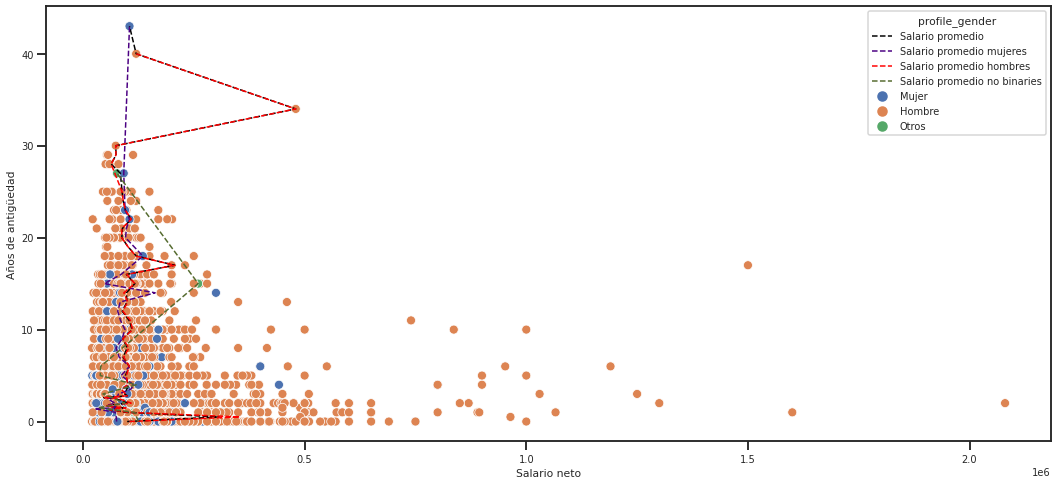

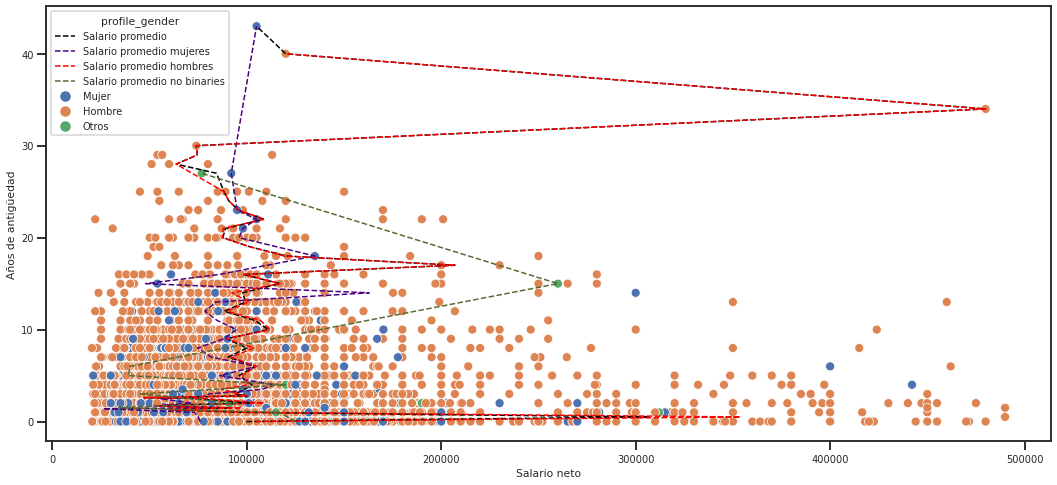

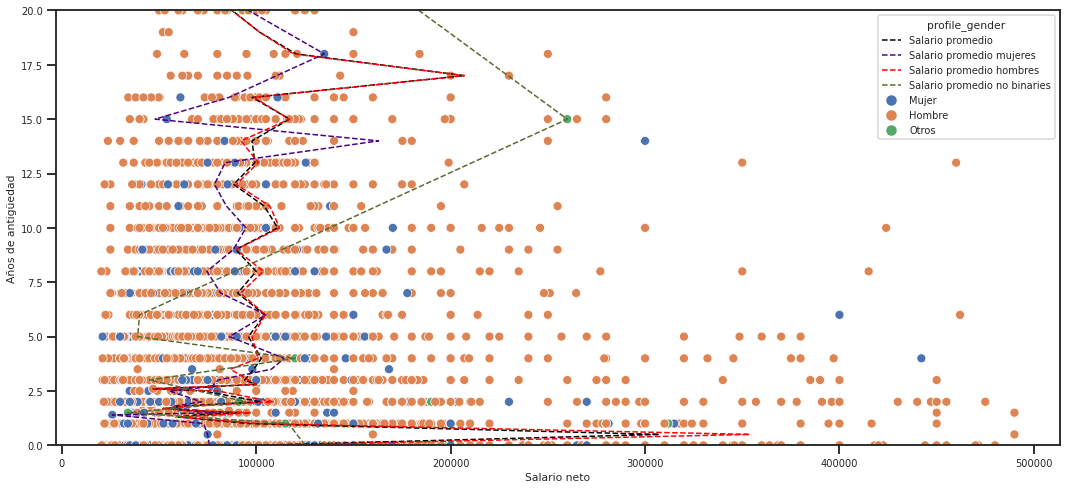

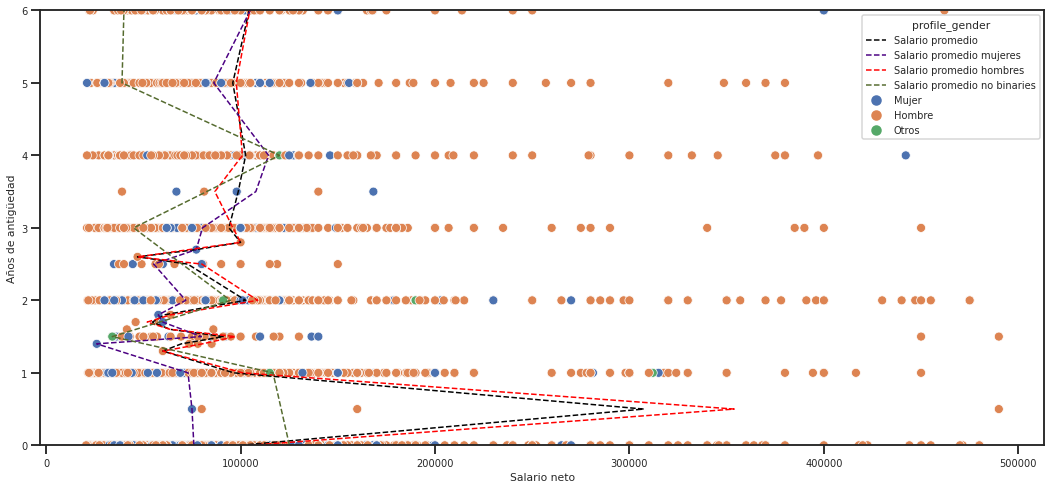

In [186]:
#Grafico todo, esta vez incluyendo los salarios promedio por cada genero
sns.set_context('talk',font_scale=0.6,rc={'figure.figsize':(10.0,15.0)})
plt.figure(figsize=(18,8))
plt.xlabel('Salario neto')
plt.ylabel('Años de antigüedad')
plt.plot(mean,years,linewidth=1.5,linestyle='--',label='Salario promedio',color='black')
plt.plot(mean_w,years_w,linewidth=1.5,linestyle='--',label='Salario promedio mujeres',color='indigo')
plt.plot(mean_m,years_m,linewidth=1.5,linestyle='--',label='Salario promedio hombres',color='red')
plt.plot(mean_q,years_q,linewidth=1.5,linestyle='--',label='Salario promedio no binaries',color='darkolivegreen')
sns.scatterplot(data=dff,x='salary_monthly_NETO',y='work_years_in_company',hue='profile_gender')

#Al igual que antes, restrinjo salarios mayores a 500000 para ver mejor los datos donde hay mas acumulación
dfr = dff[dff['salary_monthly_NETO']<500000]
sns.set_context('talk',font_scale=0.6,rc={'figure.figsize':(10.0,15.0)})
plt.figure(figsize=(18,8))
plt.xlabel('Salario neto')
plt.ylabel('Años de antigüedad')
plt.plot(mean,years,linewidth=1.5,linestyle='--',label='Salario promedio',color='black')
plt.plot(mean_w,years_w,linewidth=1.5,linestyle='--',label='Salario promedio mujeres',color='indigo')
plt.plot(mean_m,years_m,linewidth=1.5,linestyle='--',label='Salario promedio hombres',color='red')
plt.plot(mean_q,years_q,linewidth=1.5,linestyle='--',label='Salario promedio no binaries',color='darkolivegreen')
sns.scatterplot(data=dfr,x='salary_monthly_NETO',y='work_years_in_company',hue='profile_gender')

#Ahora corto el grafico para valores de antiguedad mayores a 20 años, para distinguir mejor la zona donde hay mas acumulación
dfr = dff[dff['salary_monthly_NETO']<500000]
sns.set_context('talk',font_scale=0.6,rc={'figure.figsize':(10.0,15.0)})
plt.figure(figsize=(18,8))
plt.xlabel('Salario neto')
plt.ylabel('Años de antigüedad')
plt.ylim([0,20])
plt.plot(mean,years,linewidth=1.5,linestyle='--',label='Salario promedio',color='black')
plt.plot(mean_w,years_w,linewidth=1.5,linestyle='--',label='Salario promedio mujeres',color='indigo')
plt.plot(mean_m,years_m,linewidth=1.5,linestyle='--',label='Salario promedio hombres',color='red')
plt.plot(mean_q,years_q,linewidth=1.5,linestyle='--',label='Salario promedio no binaries',color='darkolivegreen')
sns.scatterplot(data=dfr,x='salary_monthly_NETO',y='work_years_in_company',hue='profile_gender')

#Con el mismo proposito, corto para años de antiguedad mayores a 5 años
dfr = dff[dff['salary_monthly_NETO']<500000]
sns.set_context('talk',font_scale=0.6,rc={'figure.figsize':(10.0,15.0)})
plt.figure(figsize=(18,8))
plt.xlabel('Salario neto')
plt.ylabel('Años de antigüedad')
plt.ylim([0,6])
plt.plot(mean,years,linewidth=1.5,linestyle='--',label='Salario promedio',color='black')
plt.plot(mean_w,years_w,linewidth=1.5,linestyle='--',label='Salario promedio mujeres',color='indigo')
plt.plot(mean_m,years_m,linewidth=1.5,linestyle='--',label='Salario promedio hombres',color='red')
plt.plot(mean_q,years_q,linewidth=1.5,linestyle='--',label='Salario promedio no binaries',color='darkolivegreen')
sns.scatterplot(data=dfr,x='salary_monthly_NETO',y='work_years_in_company',hue='profile_gender')

Se puede ver que para casi todos los valores de "años de atiguedad", la media de salario de los varoenes es superior al resto.
Por otro lado se puede ver también que la cantidad de puntos para "Otros" es muy inferior al resto y no se pueden sacar conclusiones al respecto con tan pocos datos.